In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import re 
import string
from nltk import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import pickle
from textblob import TextBlob

In [3]:
full_data=pd.read_csv('../datasets/mental_disorders_reddit.csv')
full_data=full_data.dropna(how='any')
full_data.drop(['created_utc'], axis=1)
full_data['subreddit'].value_counts().reset_index(name='count')
full_data=full_data.dropna(how='any')
full_data=full_data.drop(['created_utc'], axis=1)
full_data=full_data.drop(['over_18'], axis=1)
full_data

,title,selftext,created_utc,over_18,subreddit
0,Life is so pointless without others,Does anyone else think the most important part...,1650356960,False,BPD
1,Cold rage?,Hello fellow friends 😄\n\nI'm on the BPD spect...,1650356660,False,BPD
2,I don’t know who I am,My [F20] bf [M20] told me today (after I said ...,1650355379,False,BPD
3,HELP! Opinions! Advice!,"Okay, I’m about to open up about many things I...",1650353430,False,BPD
4,help,[removed],1650350907,False,BPD
...,...,...,...,...,...
701782,Where can you go to get help for someone menta...,Someone (a war veteran) I know is mentally ill...,1396298261,False,mentalillness
701783,I am rooster illusion,AMA,1344639905,False,mentalillness
701784,I look again to make sure so one is near me an...,NaN,1353891546,False,mentalillness
701785,"NAMI | Peer-to-Peer is a unique, experiential ...",NaN,1348724331,False,mentalillness


In [4]:
full_data['over_18'].value_counts()

False    682833
True      18954
Name: over_18, dtype: int64

In [3]:
full_data['subreddit'].value_counts()

BPD              233119
Anxiety          167032
depression       156708
bipolar           46666
mentalillness     44249
schizophrenia     20280
Name: subreddit, dtype: int64

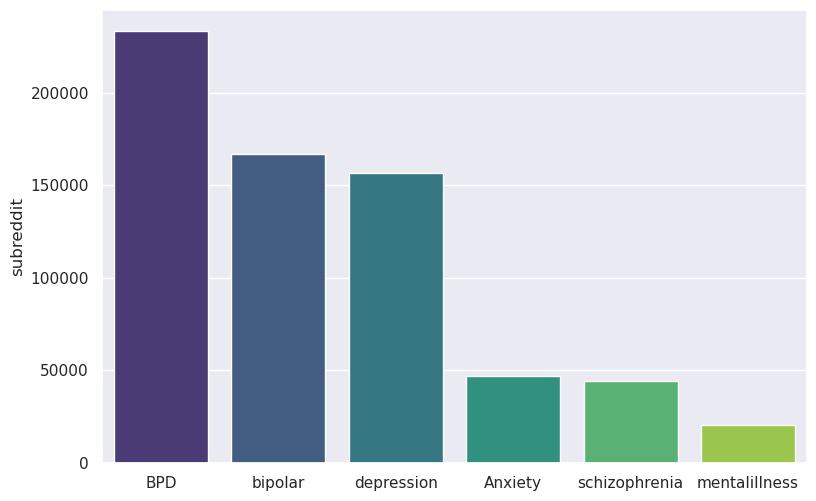

In [4]:
plt.figure(figsize=(20, 6), dpi=100)

plt.subplot(1, 2, 1)
sns.barplot(x = full_data['subreddit'].unique(), y = full_data['subreddit'].value_counts(), palette= 'viridis')

plt.show()

In [5]:
def convert_lowercase(text):
    text = text.lower()
    return text

In [6]:
def remove_url(text):
    re_url = re.compile('https?://\S+|www\.\S+')
    return re_url.sub('', text)

In [7]:
exclude = string.punctuation

def remove_punc(text):
    return text.translate(str.maketrans('', '', exclude))


In [8]:
def remove_stopwords(text):
    new_list = []
    words = word_tokenize(text)
    stopwrds = stopwords.words('english')
    for word in words:
        if word not in stopwrds:
            new_list.append(word)
    return ' '.join(new_list)


In [9]:
def steaming(text):
    ps = PorterStemmer()
    tokens = text.split()
    stemmed_tokens = [ps.stem(token) for token in tokens]
    return ' '.join(stemmed_tokens)

In [10]:
 def lemmatize_words(text):
    lemmatizer = WordNetLemmatizer()
    words = text.split()
    words = [lemmatizer.lemmatize(word,pos='v') for word in words]
    return ' '.join(words)

In [12]:
full_data['selftext'] = full_data['selftext'].apply(convert_lowercase)
full_data['selftext'] = full_data['selftext'].apply(remove_url)
full_data['selftext'] = full_data['selftext'].apply(remove_punc)
full_data['selftext'] = full_data['selftext'].apply(remove_stopwords)
full_data['selftext'] = full_data['selftext'].apply(steaming)
full_data['selftext'] = full_data['selftext'].apply(lemmatize_words)


In [13]:
full_data['selftext']=full_data['selftext'].astype(str).apply(lambda x: x.encode('ascii', 'ignore').decode('ascii'))
full_data['title']=full_data['title'].astype(str).apply(lambda x: x.encode('ascii', 'ignore').decode('ascii'))

In [14]:

full_data['title'] = full_data['title'].apply(convert_lowercase)
full_data['title'] = full_data['title'].apply(remove_url)
full_data['title'] = full_data['title'].apply(remove_punc)
full_data['title'] = full_data['title'].apply(remove_stopwords)
full_data['title'] = full_data['title'].apply(steaming)
full_data['title'] = full_data['title'].apply(lemmatize_words)


In [15]:
full_data = full_data[full_data.selftext != 'remov']
full_data = full_data[full_data.title != 'remov']

In [ ]:
full_data.to_csv('../datasets/mental_disorders_reddit_preprossed.csv')